In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import time
import sklearn
from random import shuffle
# nltk.download('vedar_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Fetching Tweets from twitter
'''import tweepy
import csv #Import csv
auth = tweepy.auth.OAuthHandler('xxxxxxxxx', 'xxxxxxxxxxxx')
auth.set_access_token('xxxxxxxxxx', 'xxxxxxxxxxxx')

api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/create a file to append data to
csvFile = open('Dataset.csv', 'a',encoding="utf-8",newline='')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,count=100000,
                           q = "Covid-19",re.sub('[^a-zA-Z]', '',clean )
                           tweet_mode='extended',
                           lang = "en").items():

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.text,tweet.user.screen_name,tweet.user.location])
    #print(tweet.full_text,tweet.user.screen_name,tweet.user.location)
csvFile.close()'''

# Data Preprocessing
# Importing the Dataset
dataset = pd.read_csv('Dataset.csv', nrows = 3000)
dataset = dataset.drop('username', 1)
# dataset = dataset.drop('location', 1)
dataset = dataset.replace('',np.nan)
dataset = dataset.dropna(axis="rows", how="any")
dataset

,text,location
0,RT @tsum_africa: In response to the current #C...,Singapore
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ"
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru"
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall
...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be)
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China"
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States


In [3]:
# Data Cleaning
# Cleaning RT, Lnks and @Username
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                            
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    return lst
dataset['clean_text'] = clean_tweets(dataset['text'])
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,"In response to the current #COVID19 crisis, ..."
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,No presidential broadcast on COVID-19 updates...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",Covid-19 Outbreak in Nigeria Is Just One of Af...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru","I have been tested positive for Covid-19, and..."
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,"If you’re struggling during #COVID19, you’re ..."
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,"Hi, Due to pandemic Covid-19, I have lost my ..."
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),A #qanda episode about the effect of covid-19...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China","With 53 new cases, Nepal’s Covid-19 tally jum..."
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,"“Dr. Eric Topol, the director of the Scripps ..."


In [4]:
# Removing Emojis
def removeEmoji(result):
    return result.encode('ascii', 'ignore').decode('ascii')
dataset['clean_text'] = [removeEmoji(i) for i in dataset['clean_text']]
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,"In response to the current #COVID19 crisis, ..."
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,No presidential broadcast on COVID-19 updates...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",Covid-19 Outbreak in Nigeria Is Just One of Af...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru","I have been tested positive for Covid-19, and..."
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,"If youre struggling during #COVID19, youre no..."
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,"Hi, Due to pandemic Covid-19, I have lost my ..."
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),A #qanda episode about the effect of covid-19...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China","With 53 new cases, Nepals Covid-19 tally jump..."
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,"Dr. Eric Topol, the director of the Scripps R..."


In [5]:
# Removing URL
def removeURL(str):
    temp = ''
    clean_1 = re.match('(.*?)http.*?\s?(.*?)', str)
    clean_2 = re.match('(.*?)https.*?\s?(.*?)', str)

    if clean_1:
        temp = temp + clean_1.group(1)
        temp = temp + clean_1.group(2)
    elif clean_2:
        temp = temp + clean_2.group(1)
        temp = temp + clean_2.group(2)
    else:
        temp = str
    return temp

dataset['clean_text'] = dataset['clean_text'].apply(lambda tweet: removeURL(tweet))
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,"In response to the current #COVID19 crisis, ..."
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,No presidential broadcast on COVID-19 updates...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",Covid-19 Outbreak in Nigeria Is Just One of Af...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru","I have been tested positive for Covid-19, and..."
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,"If youre struggling during #COVID19, youre no..."
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,"Hi, Due to pandemic Covid-19, I have lost my ..."
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),A #qanda episode about the effect of covid-19...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China","With 53 new cases, Nepals Covid-19 tally jump..."
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,"Dr. Eric Topol, the director of the Scripps R..."


In [6]:
# Removing Punctuations
dataset['clean_text'] = [re.sub('[^a-zA-Z]', ' ', i) for i in dataset['clean_text']]
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,In response to the current COVID crisis ...
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,No presidential broadcast on COVID updates...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",Covid Outbreak in Nigeria Is Just One of Af...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",I have been tested positive for Covid and...
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,If youre struggling during COVID youre no...
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,Hi Due to pandemic Covid I have lost my ...
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),A qanda episode about the effect of covid ...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",With new cases Nepals Covid tally jump...
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,Dr Eric Topol the director of the Scripps R...


In [7]:
# Lowercase
dataset['clean_text'] = [i.lower() for i in dataset['clean_text']]
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,in response to the current covid crisis ...
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,no presidential broadcast on covid updates...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak in nigeria is just one of af...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",i have been tested positive for covid and...
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,if youre struggling during covid youre no...
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due to pandemic covid i have lost my ...
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),a qanda episode about the effect of covid ...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",with new cases nepals covid tally jump...
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol the director of the scripps r...


In [8]:
# Removing Extra-Whitespace
def remove_whitespace(mtext):
    return " ".join(mtext.split())
dataset['clean_text'] = [remove_whitespace(i) for i in dataset['clean_text']]
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,in response to the current covid crisis in col...
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,no presidential broadcast on covid updates tod...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak in nigeria is just one of afric...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",i have been tested positive for covid and isol...
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,if youre struggling during covid youre not alo...
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due to pandemic covid i have lost my job an...
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),a qanda episode about the effect of covid on y...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",with new cases nepals covid tally jumps to ban...
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol the director of the scripps rese...


In [9]:
# Removing stopwords
stopWords = set(stopwords.words("english"))
dataset['clean_text'] = dataset['clean_text'].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in stopWords]))
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,response current covid crisis collaboration te...
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidential broadcast covid updates today non...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africas alarming ho...
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",tested positive covid isolated home taking pre...
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,youre struggling covid youre alone suicide pre...
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandemic covid lost job currently looki...
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episode effect covid young ppls lives on...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new cases nepals covid tally jumps banke recor...
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripps research transl...


In [10]:
# Stemming
ps = PorterStemmer()
focused_words = ['coronavirus', 'covid', 'quarantine', 'coronavirusoutbreak', 'virus', 'corona', 'lockdown', 'economy']
def stemWords(word):
    if word in focused_words:
        return word
    else:
        return ps.stem(word)

dataset['clean_text'] = dataset['clean_text'].apply(lambda tweet: ' '.join([stemWords(word) for word in tweet.split()]))
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,respons current covid crisi collabor team publish
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidenti broadcast covid updat today none pl...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africa alarm hot spot
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",test posit covid isol home take precautionari ...
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,your struggl covid your alon suicid prevent re...
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandem covid lost job current look new ...
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episod effect covid young ppl live one p...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new case nepal covid talli jump bank record ne...
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripp research transla...


In [11]:
# Lematization
wnl = WordNetLemmatizer()

def lemmatizeWords(word):
    if word in focused_words:
        return word
    else:
        return wnl.lemmatize(word)

dataset['clean_text'] = dataset['clean_text'].apply(lambda tweet: ' '.join([lemmatizeWords(word) for word in tweet.split()]))
dataset

,text,location,clean_text
0,RT @tsum_africa: In response to the current #C...,Singapore,respons current covid crisi collabor team publish
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidenti broadcast covid updat today none pl...
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africa alarm hot spot
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",test posit covid isol home take precautionari ...
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,your struggl covid your alon suicid prevent re...
...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandem covid lost job current look new ...
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episod effect covid young ppl live one p...
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new case nepal covid talli jump bank record ne...
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripp research transla...


In [12]:
# Calculating sentiment polarity for tweets
import textblob
from textblob import TextBlob
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

dataset['polarity'] = dataset.clean_text.apply(detect_polarity)
dataset

,text,location,clean_text,polarity
0,RT @tsum_africa: In response to the current #C...,Singapore,respons current covid crisi collabor team publish,0.000000
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidenti broadcast covid updat today none pl...,0.000000
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africa alarm hot spot,0.250000
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",test posit covid isol home take precautionari ...,0.000000
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,your struggl covid your alon suicid prevent re...,-0.100000
...,...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandem covid lost job current look new ...,0.003788
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episod effect covid young ppl live one p...,0.112121
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new case nepal covid talli jump bank record ne...,0.136364
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripp research transla...,0.400000


In [13]:
# Labeling sentiment subjectivity for tweets
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

dataset['subjectivity'] = dataset.clean_text.apply(detect_subjectivity)
dataset

,text,location,clean_text,polarity,subjectivity
0,RT @tsum_africa: In response to the current #C...,Singapore,respons current covid crisi collabor team publish,0.000000,0.400000
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidenti broadcast covid updat today none pl...,0.000000,0.000000
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africa alarm hot spot,0.250000,0.850000
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",test posit covid isol home take precautionari ...,0.000000,0.000000
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,your struggl covid your alon suicid prevent re...,-0.100000,0.100000
...,...,...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandem covid lost job current look new ...,0.003788,0.409848
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episod effect covid young ppl live one p...,0.112121,0.366667
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new case nepal covid talli jump bank record ne...,0.136364,0.454545
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripp research transla...,0.400000,0.700000


In [14]:
# Labeling the tweets with proper sentiment
def detect_sentiment(text):
    if TextBlob(text).sentiment.polarity > 0:
        return 1
    elif TextBlob(text).sentiment.polarity < 0:
        return -1
    else:
        return 0
dataset['sentiment'] = dataset.clean_text.apply(detect_sentiment)
dataset

,text,location,clean_text,polarity,subjectivity,sentiment
0,RT @tsum_africa: In response to the current #C...,Singapore,respons current covid crisi collabor team publish,0.000000,0.400000,0
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidenti broadcast covid updat today none pl...,0.000000,0.000000,0
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africa alarm hot spot,0.250000,0.850000,1
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",test posit covid isol home take precautionari ...,0.000000,0.000000,0
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,your struggl covid your alon suicid prevent re...,-0.100000,0.100000,-1
...,...,...,...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandem covid lost job current look new ...,0.003788,0.409848,1
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episod effect covid young ppl live one p...,0.112121,0.366667,1
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new case nepal covid talli jump bank record ne...,0.136364,0.454545,1
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripp research transla...,0.400000,0.700000,1


In [15]:
# Creating the Bag of Words Model by Vectorization
corpus = dataset['clean_text']
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 5].values
dataset

,text,location,clean_text,polarity,subjectivity,sentiment
0,RT @tsum_africa: In response to the current #C...,Singapore,respons current covid crisi collabor team publish,0.000000,0.400000,0
1,RT @FemAdesina: No presidential broadcast on C...,port Harcourt,presidenti broadcast covid updat today none pl...,0.000000,0.000000,0
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,"Tinton Falls, NJ",covid outbreak nigeria one africa alarm hot spot,0.250000,0.850000,1
4,RT @GhulamABilour: I have been tested positive...,"Sexi, Peru",test posit covid isol home take precautionari ...,0.000000,0.000000,0
5,RT @800273TALK: If you’re struggling during #C...,O'Boyle Hall,your struggl covid your alon suicid prevent re...,-0.100000,0.100000,-1
...,...,...,...,...,...,...
2991,"RT @Shazwanmisai: Hi, Due to pandemic Covid-19...",Malaysia,hi due pandem covid lost job current look new ...,0.003788,0.409848,1
2992,RT @Asher_Wolf: A #qanda episode about the eff...,Dharug Country (Always Was Always Will Be),qanda episod effect covid young ppl live one p...,0.112121,0.366667,1
2993,"RT @kathmandupost: With 53 new cases, Nepal’s ...","Sichuan, People's Republic of China",new case nepal covid talli jump bank record ne...,0.136364,0.454545,1
2994,"RT @BillKristol: “Dr. Eric Topol, the director...",United States,dr eric topol director scripp research transla...,0.400000,0.700000,1


In [16]:
# Model Processing
# Splitting the dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
# Fitting Naive Bayes to the Training Set
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Prediction the Test set results
y_pred = classifier.predict(X_test)

In [19]:
# Predicting the accuracy
from sklearn.metrics import classification_report, accuracy_score
print("The accuracy of this model is")
print(accuracy_score(y_pred,y_test)*100)

The accuracy of this model is
87.2289156626506


In [20]:
print("Training Accuracy : ", classifier.score(X_train, y_train))
print("Validation Accuracy : ", classifier.score(X_test, y_test))

Training Accuracy :  1.0
Validation Accuracy :  0.8722891566265061


<AxesSubplot:>

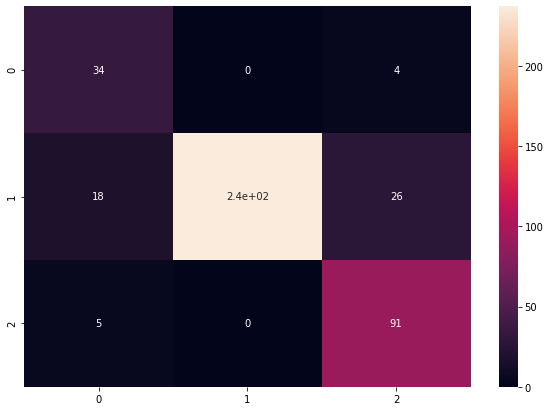

In [21]:
#--------------Plotting Section-------------
'''---------Plotting Confusion Matrix-----------'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrx = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrx,annot=True)

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Negative            Neutral             Positive'),
 Text(0, 0.5, '#Tweets'),
 Text(0.5, 1.0, 'Sentiment Score of COVID-19 Tweets')]

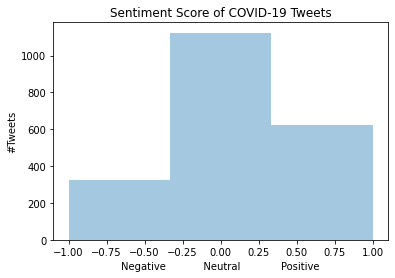

In [22]:
#-------Bargraph Of Sentiment--------
see = []

for twt in dataset.sentiment:
    see.append(twt)

ax = sns.distplot(see,kde=False,bins=3)
ax.set(xlabel = 'Negative            Neutral             Positive'
       ,ylabel = '#Tweets',title = 'Sentiment Score of COVID-19 Tweets')

In [23]:
#-----------Emotions of the Tweets----------


from collections import Counter

def con(sentence):
    emotion_list = []
    sentence = sentence.split(' ')
    with open('emotions.txt','r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",",'').replace("'",'').strip()
            word, emotion = clear_line.split(':')

            if word in sentence:
                emotion_list.append(emotion)
        w = Counter(emotion_list)
        return w



dataset['emotion'] = dataset['clean_text'].apply(lambda x: con(x))
emotions=con(dataset['clean_text'].sum())

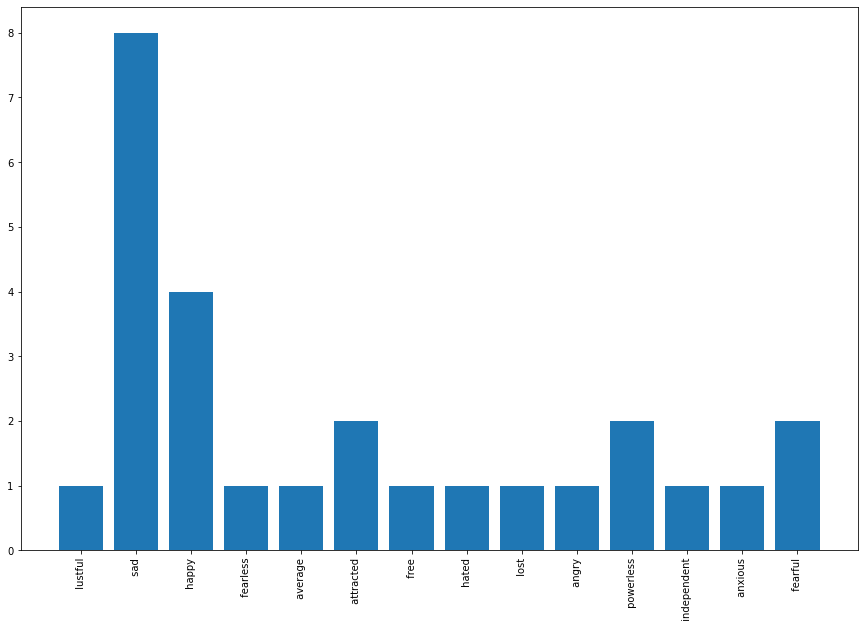

In [24]:
#--------Plotting Emotion Bargraph--------

plt.figure(figsize = (15,10))
plt.bar(emotions.keys(),emotions.values())
plt.xticks(rotation = 90)
plt.show()

In [25]:
#---------WordCloud-----------


from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import urllib
import requests
import matplotlib.pyplot as plt
def generate_wordcloud(all_words):
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(Mask)
    wc = WordCloud(background_color='black', height=750, width=2000,mask=Mask).generate(all_words)
    plt.figure(figsize=(10,20))
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
    plt.axis('off')
    plt.show()

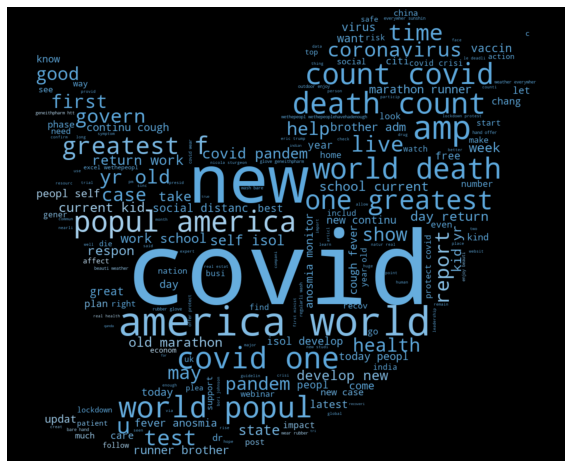

In [26]:
#------Positve Sentiment--------

all_words = ' '.join([text for text in dataset['clean_text'][dataset.sentiment == 1]])
generate_wordcloud(all_words)

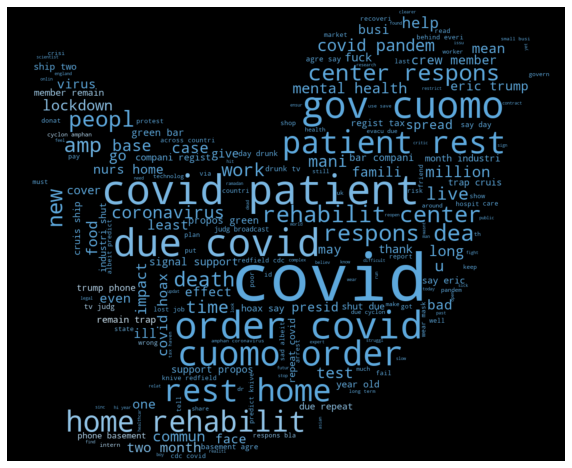

In [27]:
'''------Negative Sentiment--------'''

all_words = ' '.join([text for text in dataset['clean_text'][dataset.sentiment == -1]])
generate_wordcloud(all_words)

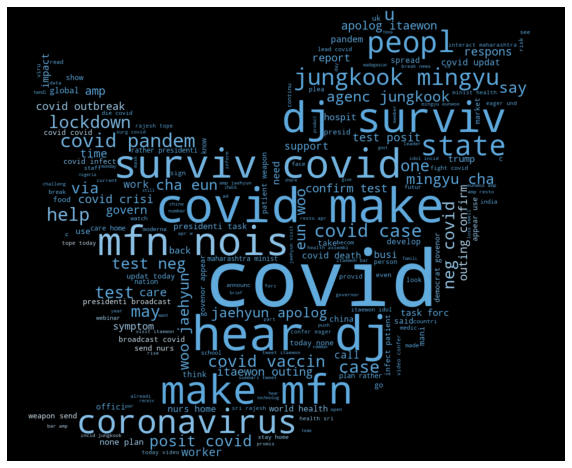

In [28]:
'''------Negative Sentiment--------'''

all_words = ' '.join([text for text in dataset['clean_text'][dataset.sentiment == 0]])
generate_wordcloud(all_words)

Positive


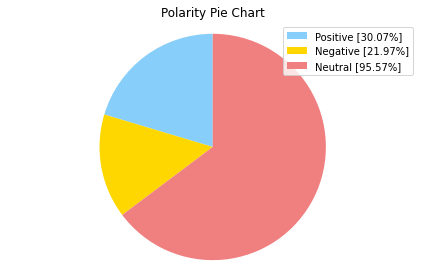

In [29]:
#---------Pie Graph-----------

def percentage(part,whole):
    return 100*float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0


for tweet in dataset.clean_text:
    analyzer = TextBlob(tweet)
    polarity += analyzer.sentiment.polarity
    if analyzer.sentiment.polarity > 0:
        positive += 1
    elif analyzer.sentiment.polarity < 0:
        negative += 1
    else:
        neutral += 1
        
# print(positive)
# print(negative)
# print(neutral)
# print(polarity)

positive = percentage(positive,(positive + negative + neutral))
negative = percentage(negative,(positive + negative + neutral))
neutral = percentage(neutral,(positive + negative + neutral))

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

if (polarity > 0):
    print("Positive")
elif (polarity < 0):
    print("Negative")
elif (polarity == 0):
    print("Neutral")

labels = ['Positive ['+str(positive)+'%]', 'Negative ['+str(negative)+'%]', 
'Neutral ['+str(neutral)+'%]']
sizes = [positive, negative, neutral]
colors = ['lightskyblue','gold','lightcoral']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Polarity Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()

<AxesSubplot:>

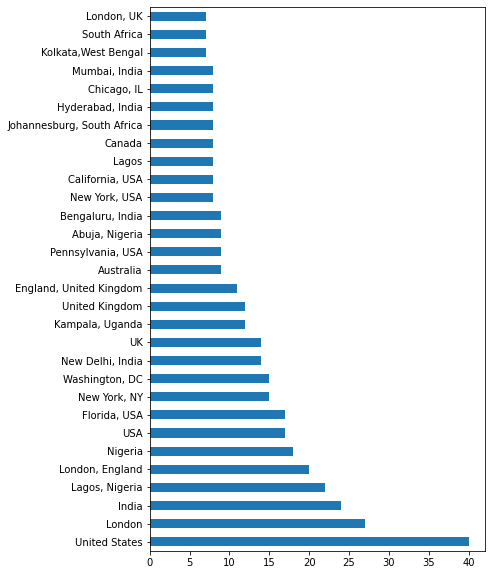

In [30]:
'''-----------Tweets Location Bargraph----------'''

dataset['location'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

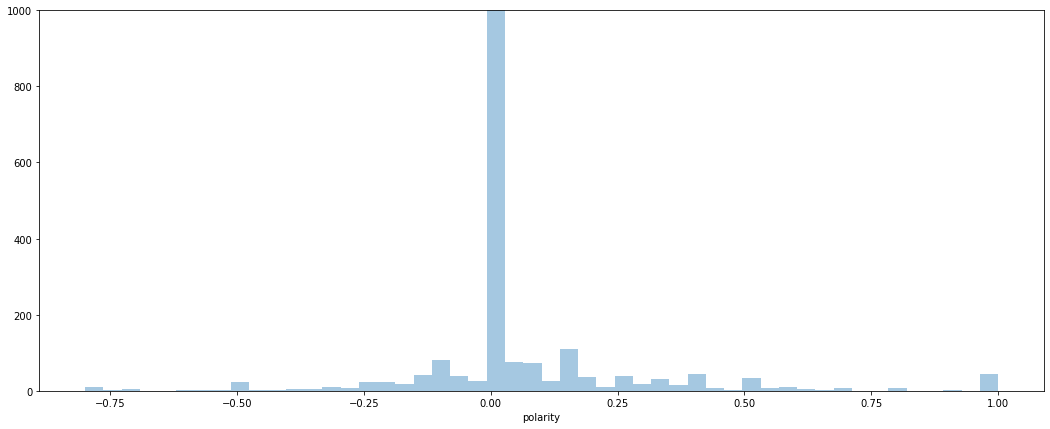

In [31]:
'''-------Fluctuations of Polarity---------'''

fig = plt.figure(figsize=(18,7))
sns.distplot(dataset['polarity'],kde=False)
plt.ylim(0,1000)

(0.0, 1000.0)

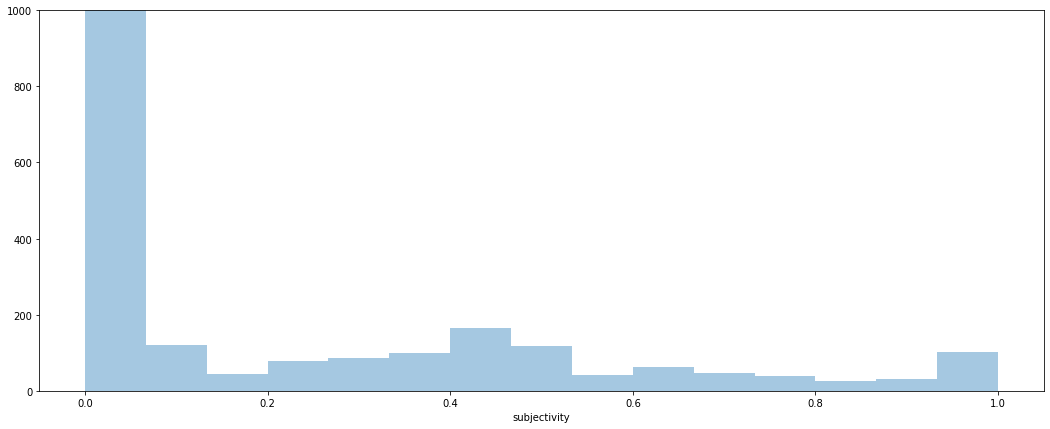

In [32]:
'''-------Fluctuations of Subjectivity---------'''

fig = plt.figure(figsize=(18,7))
sns.distplot(dataset['subjectivity'],kde=False)
plt.ylim(0,1000)

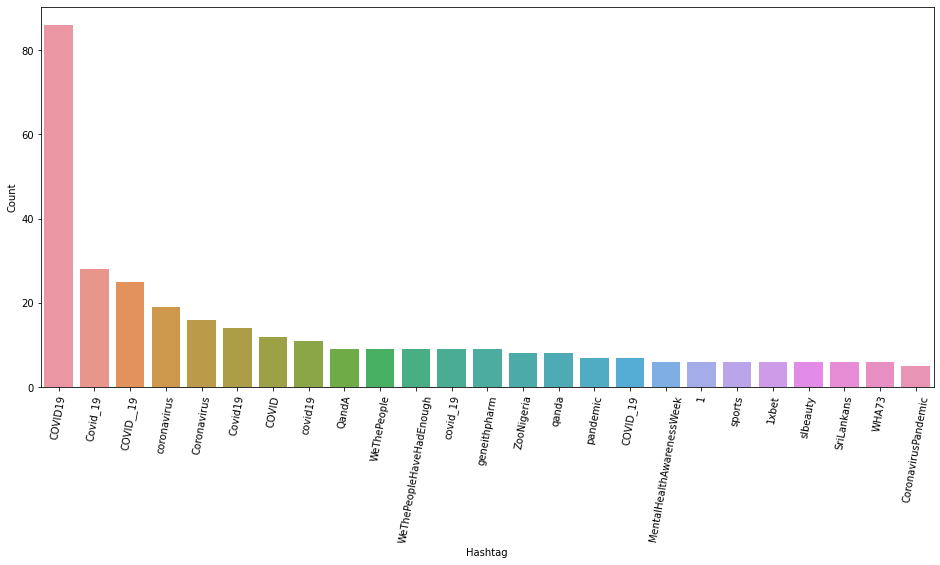

In [33]:
'''---------Creating Hastag FreqDist----------'''

# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)
    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()
    
hashtags = hashtag_extract(dataset['text'])
hashtags = sum(hashtags, [])


generate_hashtag_freqdist(hashtags)

In [34]:
import string
# Function for cleaning operation
def TextCleaning(review):
    review = review.encode(encoding="ascii", errors="ignore")
    review = review.decode()
    review = " ".join([word for word in review.split()])
    review = re.sub("@\S+", "", review)
    review = re.sub("\$", "", review)
    review = re.sub("https?:\/\/.*[\r\n]*", "", review)
    review = re.sub("#", "", review)
    punct = set(string.punctuation) 
    review = "".join([ch for ch in review if ch not in punct])
    review = review.lower()
    review = ' '.join([word for word in review.split() if word not in stopWords])
    review = ' '.join([stemWords(word) for word in review.split()])
    review = ' '.join([lemmatizeWords(word) for word in review.split()])
    print(review)
    return review

In [35]:
# Predict the sentiment for new review
def predictNewReview():
    newReview = input("Type the Review: ")
    
    if newReview =='':
        print('Invalid Review')  
    else:
        newReview = TextCleaning(newReview)
        new_review = cv.transform([newReview]).toarray()
        prediction =  classifier.predict(new_review)
        print(prediction)
        if prediction[0] == 1:
            print( "Positive Review" )
        else:
            print( "Negative Review")
predictNewReview()

Type the Review: Hello My Name Is Gourab Sarkar
hello name gourab sarkar
[0]
Negative Review
